In [53]:
import wandb
api = wandb.Api()
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [71]:
def get_df_selection(df, key, cond):
    '''Take only elements from the DataFrame where the *key* matches *cond*:bool'''
    elems = []
    for i in range(df.shape[0]):
        if df['config'][i]['content'][key] == str(cond):
            elems.append(df.loc[i, :])
    print(len(elems))
    return pd.DataFrame.from_records(elems)
    
def cumulative_reward(x):
    '''Plots R(n) where R(n) is the same of the graph from 0 to n. Essentially 
    a simple discrete integration.'''
    # Basically ignore faulty runs
    if len(x) == 0:
        return np.zeros(shape=[0,])
    ret = np.zeros([len(x),])
    ret[0] = 0
    for i in range(1, len(x)):
        ret[i] = ret[i-1] + x[i]
    return ret

def plotter(df, keys, f=None):
    '''Basic plotting utility that can apply a function on the data.'''
    f = [f if f else lambda x: x][0]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    for ax_idx, ax in enumerate(axes.flatten()):
        for i in range(df.shape[0]):
            data = df[keys[ax_idx]][i]
            steps = df['_step'][i]
            ax.plot(np.linspace(0, steps[-1], len(data)), f(data))
            ax.set(title=keys[ax_idx], xlabel='steps', xlim=[0,1.4e6])
    plt.legend([x for x in df['name']])

In [77]:
keys = ['eval/eval_ep_rew', 'eval/success_rate', 'eval/eval_intr_rew', 'c_step']
df = pd.read_json('research.json')

df = get_df_selection(df, 'flat_agent', False)

KeyError: 'content'

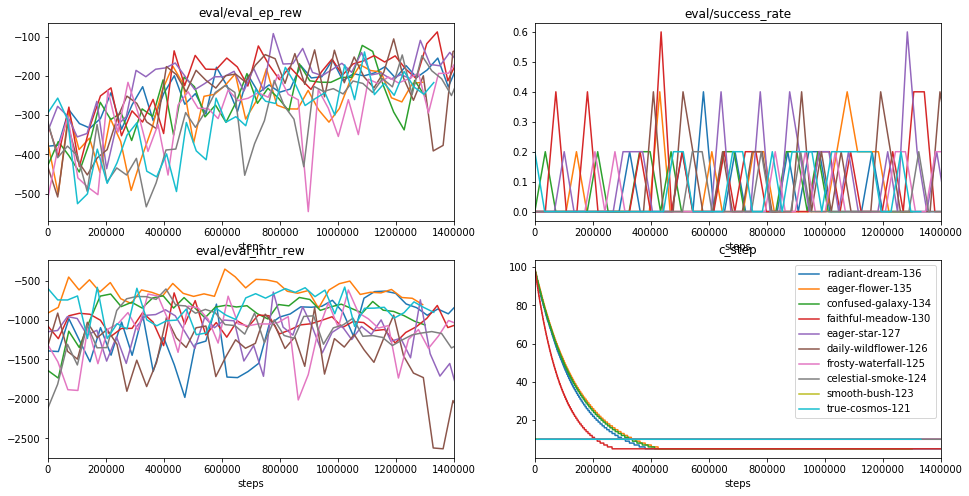

In [73]:
plotter(df, keys)

In [74]:
cumul_ep_rew = [cumulative_reward(x) if len(x) > 0 else 0 for x in df[keys[1]]]

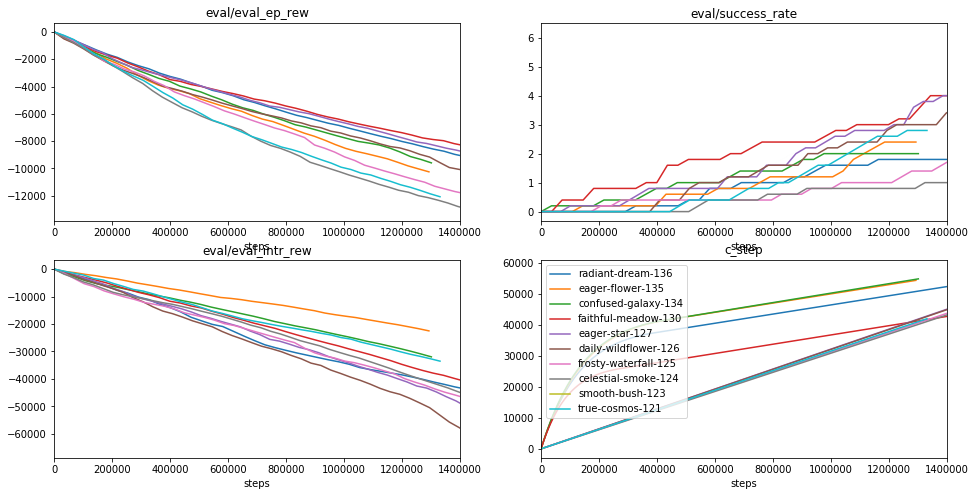

In [75]:
plotter(df, keys, cumulative_reward)

In [76]:
df['name']  

0       radiant-dream-136
1        eager-flower-135
2     confused-galaxy-134
3     faithful-meadow-130
4          eager-star-127
5    daily-wildflower-126
6    frosty-waterfall-125
7     celestial-smoke-124
8         smooth-bush-123
9         true-cosmos-121
Name: name, dtype: object

In [67]:
df['config'][4]

{'flags': {'struct': True, 'readonly': None},
 'parent': None,
 'content': {'env': 'Vrep',
  'log': 'True',
  'tau': '0.005',
  'mock': 'False',
  'seed': '2',
  'vrep': 'True',
  'decay': 'False',
  'force': 'True',
  'ri_re': 'True',
  'visit': 'False',
  'c_step': '10',
  'ee_pos': 'False',
  'entity': 'rlpractitioner',
  'policy': 'TD3',
  'render': 'False',
  'discount': '0.99',
  'ee_j_pos': 'True',
  'sub_mock': 'False',
  'zero_obs': '0',
  'eval_freq': '30000',
  'goal_type': 'Absolute',
  'meta_mock': 'False',
  'offpolicy': 'True',
  'sub_noise': '50.0',
  'batch_size': '128',
  'expl_noise': '0.1',
  'flat_agent': 'False',
  'load_model': 'False',
  'meta_noise': '0.5',
  'noise_clip': '0.5',
  'save_model': 'False',
  'sparse_rew': 'False',
  'sub_ctr_lr': '0.0001',
  'time_limit': '300',
  'meta_ctr_lr': '0.01',
  'policy_freq': '2',
  'sub_actr_lr': '0.0001',
  'meta_actr_lr': '0.0001',
  'policy_noise': '0.2',
  'step_decayer': "{'total_steps': 200000, 'init_step': '${c

In [49]:
df['config'][6]

{'env': 'Vrep',
 'log': True,
 'tau': 0.005,
 'mock': False,
 'seed': 2,
 'vrep': True,
 'force': True,
 'ri_re': True,
 'visit': False,
 'c_step': 10,
 'ee_pos': True,
 'policy': 'TD3',
 'render': False,
 'discount': 0.99,
 'ee_j_pos': False,
 'sub_mock': False,
 'zero_obs': 0,
 'eval_freq': 30000,
 'goal_type': 'Absolute',
 'meta_mock': False,
 'offpolicy': True,
 'sub_noise': 50,
 'batch_size': 128,
 'expl_noise': 0.1,
 'flat_agent': False,
 'load_model': False,
 'meta_noise': 0.5,
 'noise_clip': 0.5,
 'save_model': False,
 'sparse_rew': True,
 'sub_ctr_lr': 0.0001,
 'time_limit': 300,
 'meta_ctr_lr': 0.01,
 'policy_freq': 2,
 'sub_actr_lr': 0.0001,
 'meta_actr_lr': 0.0001,
 'policy_noise': 0.2,
 'max_timesteps': 100000000,
 'no_candidates': 10,
 'random_target': True,
 'sub_rew_scale': 1,
 'meta_rew_scale': 0.1,
 'start_timesteps': 1000,
 'subgoal_ee_range': 5}